<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Tarea Módulo 03

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_homework_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__:

__Rol__:

**Indicaciones**: Para el **Ejercicio 1** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente, en ambos casos cada gráfico debe tener elementos mínimos como:
- Título
- Nombre de los ejes en formato _amigable_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `cost_of_living_index` se espera que el eje del gráfico tenga por nombre `Índice de Costo de Vida`.
- Colores adecuados al tipo de datos.
- Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.

Para el **Ejercicio 2** es obligación utilizar `altair`.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from vega_datasets import data
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.themes.enable('opaque')

%matplotlib inline

## 1. Índices de Costos de Vida

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [2]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[2]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index  
0                         69.79  
1                        130.21  
2                          9.73  
3                        133.91  
4                        132.41

### Ejercicio 1.1 (5 pts)

Explique lo que se hizo en la celda anterior detalladamente.

Lo que hizo fue tomar un dataframe,despues las columnas las renombró, cambiando solo el espacio por un guion bajo, despues asignó el rango que seria solo toma el indice y le suma uno, y despues definió que los indices serian los que estaban en la columna rank despues iteró por años para concatenar por años, despues de eso reasignó los ejes según año y rango y al final reseteó los indices.

### Ejercicio 1.2 (10 pts)

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

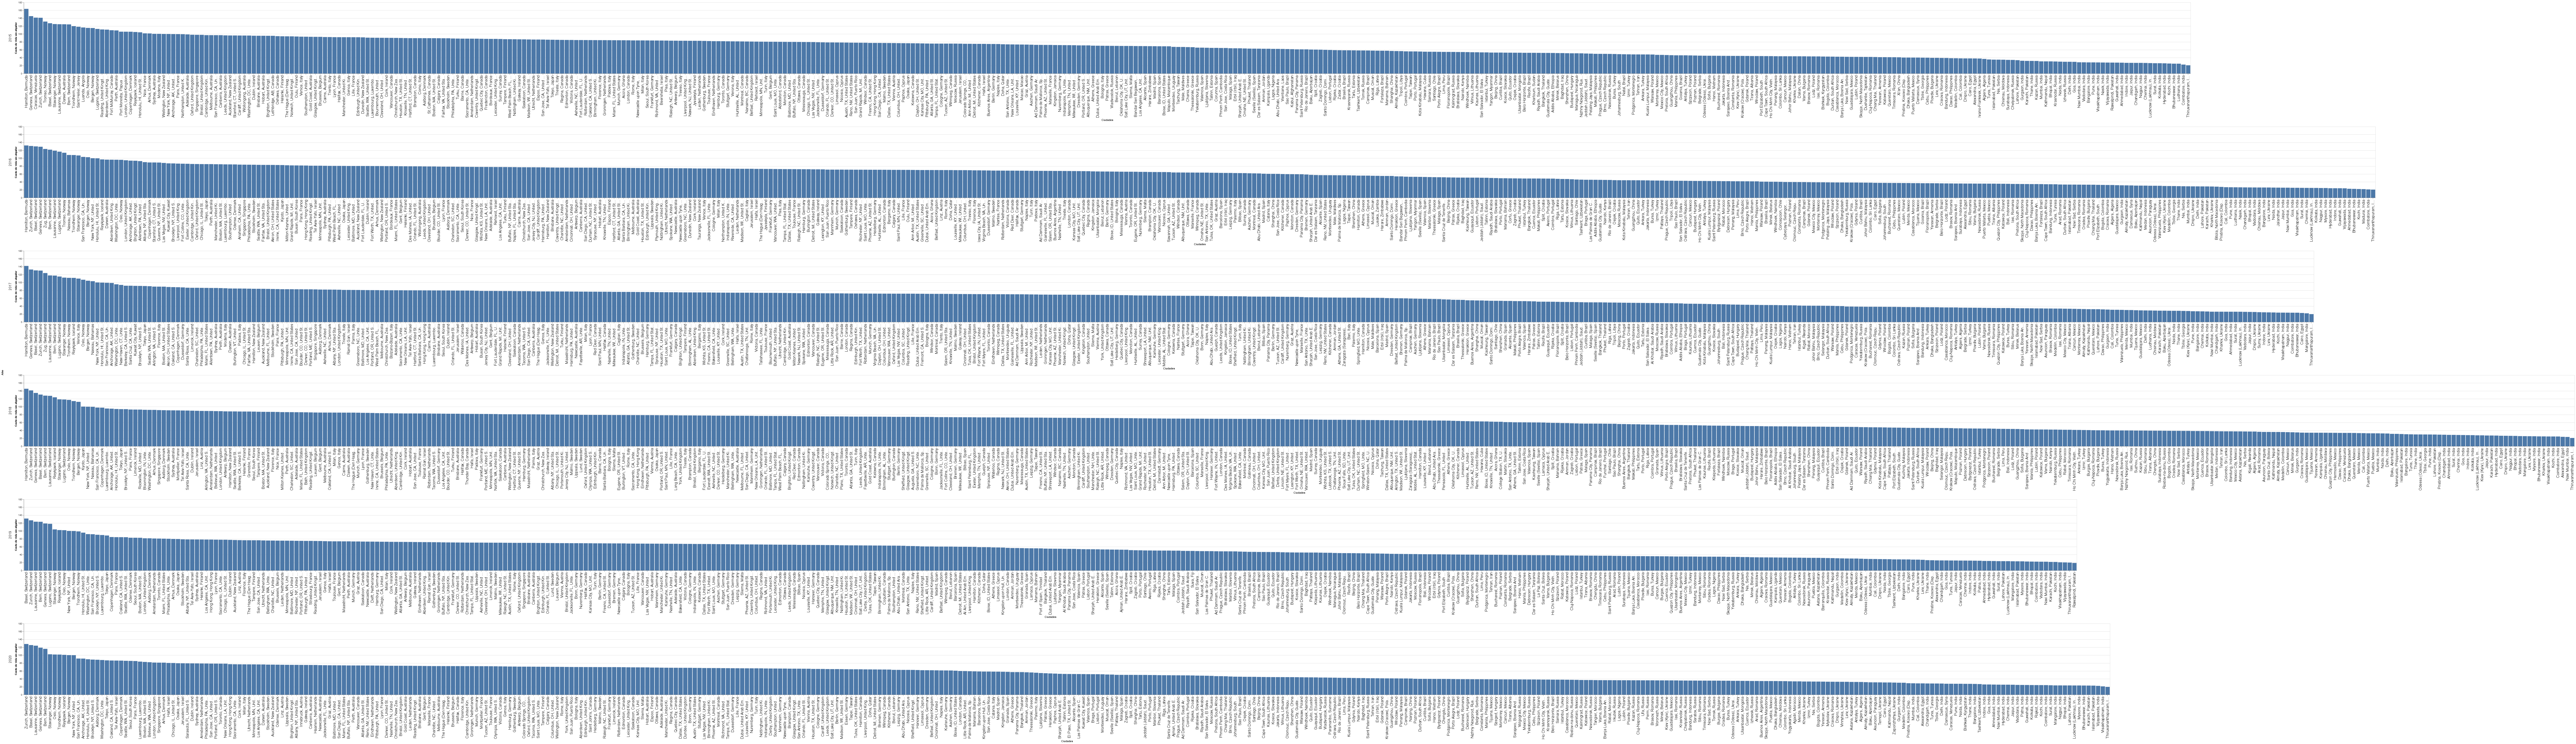

In [3]:
alt.Chart(life_cost).mark_bar().encode(
    x = alt.X('city:N', title='Ciudades', sort=alt.EncodingSortField(field="cost_of_living_index", order='descending'), axis=alt.Axis(labelFontSize=16)),
    y = alt.Y('cost_of_living_index:Q', title='Costo de vida sin alquiler'),
    row = alt.Row('year:O', title='Año', header=alt.Header(labelFontSize=15)),
    tooltip = 'cost_of_living_index:Q'
).resolve_scale(
    x = "independent"
)

Se puede ver que la ciudad con mas indice de costo de vida sin alquiler entre el 2015 y el 2018 fue Hamilton en Bermuda, ademas se puede ver que predominan ciudades del pais de suiza desde el 2016, teniando la ciudad de Zurich, suiza como la con mayor indice, pero el valor maximo de este indice ha ido disminuyendo.
En cuanto a las ciudades con menor indice de costo de vida, podemos ver que domina fuertemente ciudades de la india, teniendo en 4 de los 5 años estudiados tiene la ciudad de Thiruvananthapuram como la ciudad con menor indice, aca podemos ver tambien que el indice minimo en cada año ha tenido una disminucion.

### Ejercicio 1.3 ( pts)

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [4]:
rol_seed = 201610017  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

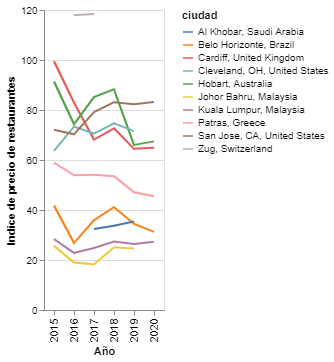

In [5]:
alt.Chart(life_cost[lambda df: df['city'].isin(my_cities)]).mark_line().encode(
    alt.X('year:O', title='Año', axis=alt.Axis(labelFontSize=11)),
    alt.Y('restaurant_price_index:Q', title='Indice de precio de restaurantes'),
    alt.Color('city:N', title='ciudad'),
    tooltip='city:N'
)

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 1.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [6]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

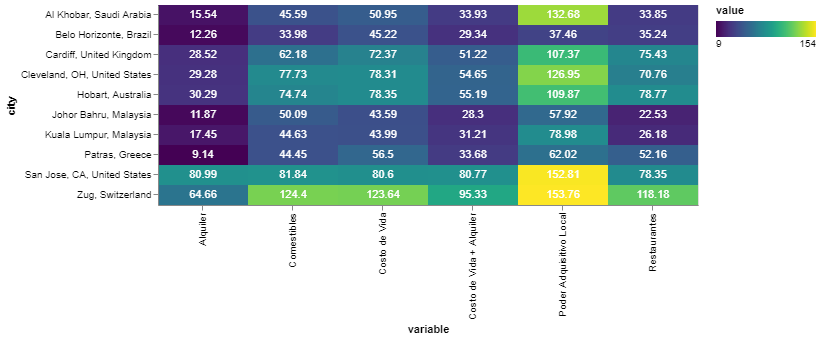

In [7]:
df_map = (life_cost[lambda df_lc: df_lc['city'].isin(my_cities)]
          .drop(['year','rank'], axis=1)
          .groupby('city')
          .agg('mean')
          .rename(columns = redable_index_names)
          .reset_index()
          .melt(id_vars=['city'])
          .round(2)
)
# Configure common options
base = alt.Chart(df_map).encode(
    alt.X('variable:O', scale=alt.Scale(paddingInner=0)),
    alt.Y('city:O', scale=alt.Scale(paddingInner=0)),
)

heatmap = base.mark_rect().encode(
    color=alt.Color('value:Q',
        scale=alt.Scale(scheme='viridis'),
        legend=alt.Legend(direction='horizontal')
    )
)

# Configure text
text = base.mark_text(baseline='middle').encode(
    text='value:Q',
    color=alt.condition(
        alt.datum.num_cars > 100,
        alt.value('black'),
        alt.value('white')
    )
)

# Draw the chart
heatmap + text

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 1.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [8]:
life_cost = life_cost.assign(country = life_cost["city"]
                             .apply(lambda x: x.split(", ")[1])
                    ).rename(columns = redable_index_names)
life_cost

year  rank                       city  Costo de Vida  Alquiler  \
0     2015     1          Hamilton, Bermuda         163.55    120.02   
1     2015     2        Geneva, Switzerland         145.18     81.46   
2     2015     3         Caracas, Venezuela         141.41     60.46   
3     2015     4        Zurich, Switzerland         141.06     66.39   
4     2015     5             Tromso, Norway         131.45     55.80   
...    ...   ...                        ...            ...       ...   
2842  2020   436          Karachi, Pakistan          23.07      4.57   
2843  2020   437        Islamabad, Pakistan          22.95      6.00   
2844  2020   438          Vijayawada, India          22.31      5.09   
2845  2020   439       Visakhapatnam, India          21.09      4.11   
2846  2020   440  Thiruvananthapuram, India          19.77      4.33   

      Costo de Vida + Alquiler  Comestibles  Restaurantes  \
0                       142.28       191.71        132.91   
1                       114.05       161.14        141.23   
2                       101.86       155.16        122.27   
3                       104.57       148.56        146.90   
4                        94.48       127.72        137.08   
...                        ...          ...           ...   
2842                     14.22        20.03         19.20   
2843                     14.84        22.23         17.22   
2844                     14.07        23.04         13.19   
2845                     12.97        21.43         13.52   
2846                     12.38        20.31         10.66   

      Poder Adquisitivo Local      country  
0                       69.79      Bermuda  
1                      130.21  Switzerland  
2                        9.73    Venezuela  
3                      133.91  Switzerland  
4                      132.41       Norway  
...                       ...          ...  
2842                    29.27     Pakistan  
2843                    30.28     Pakistan  
2844                    47.38        India  
2845                    52.04        India  
2846                    62.74        India  

[2847 rows x 10 columns]

In [9]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

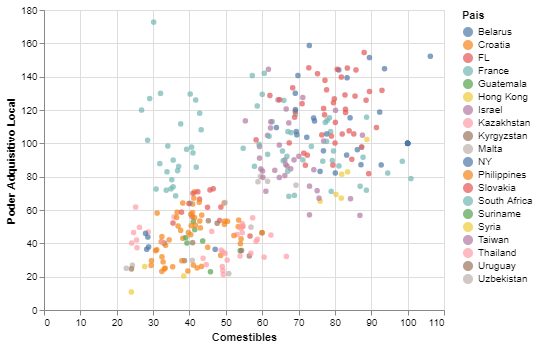

In [10]:
l_c_plot = life_cost[lambda df: df['country'].isin(my_countries)].rename(columns = {'country':'Pais'})
alt.Chart(l_c_plot).mark_circle().encode(
    x = "Comestibles:Q",
    y = "Poder Adquisitivo Local:Q",
    color = "Pais:N"
)

¿Qué comentarios puedes entregar al comparar los países seleccionados?

En los paises seleccionados podemos ver que los datos se pueden agrupar a traves de 2 grandes grupos, 

### Ejercicio 1.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [11]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

country continent
0               Andorra        EU
1  United Arab Emirates        AS
2           Afghanistan        AS
3   Antigua and Barbuda        NA
4              Anguilla        NA

In [12]:
life_cost = pd.merge(life_cost,right = countries,on='country')
life_cost

year  rank                                city  Costo de Vida  Alquiler  \
0     2015     1                   Hamilton, Bermuda         163.55    120.02   
1     2016     1                   Hamilton, Bermuda         132.32    120.87   
2     2017     1                   Hamilton, Bermuda         141.84    113.35   
3     2018     1                   Hamilton, Bermuda         145.43    110.87   
4     2015     2                 Geneva, Switzerland         145.18     81.46   
...    ...   ...                                 ...            ...       ...   
2308  2019   320                     La Paz, Bolivia          38.63     12.04   
2309  2019   322                 Santa Cruz, Bolivia          38.52     12.21   
2310  2019   215  Port of Spain, Trinidad And Tobago          55.81     19.16   
2311  2019   247                          Suva, Fiji          49.40     31.61   
2312  2020   276                Paramaribo, Suriname          43.14      7.77   

      Costo de Vida + Alquiler  Comestibles  Restaurantes  \
0                       142.28       191.71        132.91   
1                       126.82       128.62        120.35   
2                       128.19       131.79        151.38   
3                       128.76       143.47        158.75   
4                       114.05       161.14        141.23   
...                        ...          ...           ...   
2308                     25.86        32.38         33.90   
2309                     25.89        31.39         28.10   
2310                     38.21        55.72         49.60   
2311                     40.86        55.39         36.23   
2312                     26.22        45.78         34.98   

      Poder Adquisitivo Local              country continent  
0                       69.79              Bermuda        NA  
1                      118.87              Bermuda        NA  
2                       96.54              Bermuda        NA  
3                      112.26              Bermuda        NA  
4                      130.21          Switzerland        EU  
...                       ...                  ...       ...  
2308                    38.30              Bolivia        SA  
2309                    52.16              Bolivia        SA  
2310                    54.03  Trinidad And Tobago        NA  
2311                    32.34                 Fiji        OC  
2312                    22.93             Suriname        SA  

[2313 rows x 11 columns]

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

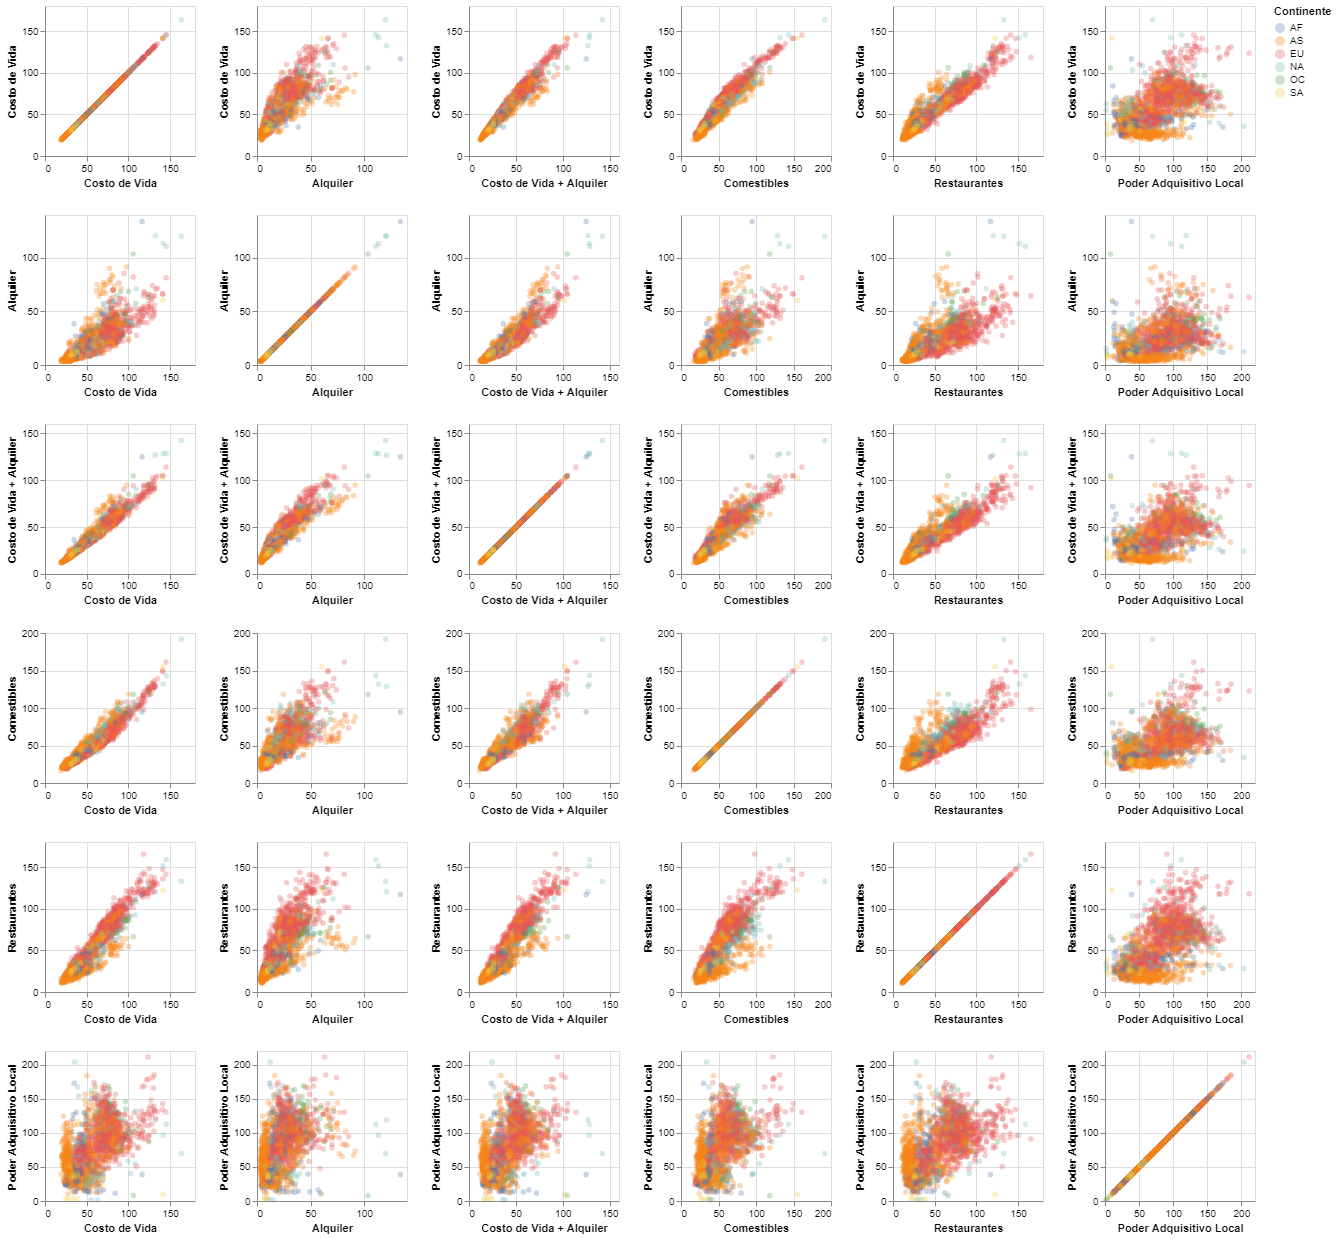

In [13]:
alt.Chart(life_cost).mark_circle(opacity=0.3).encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    alt.Color('continent:N', title='Continente')
).properties(
    width=150,
    height=150
).repeat(
    row=list(redable_index_names.values()),
    column=list(redable_index_names.values())
)

## 2. Películas

Este ejercicio utilizará el dataset de películas que viene pre-cargado en `vega_datasets`. Es intereasnte pues posee columnas de distintos tipos y una cantidad relativamente decente de registros.

In [14]:
# data.movies?

In [15]:
movies_raw = data.movies()
movies_raw.head()

Title   US_Gross  Worldwide_Gross  US_DVD_Sales  \
0              The Land Girls   146083.0         146083.0           NaN   
1      First Love, Last Rites    10876.0          10876.0           NaN   
2  I Married a Strange Person   203134.0         203134.0           NaN   
3        Let's Talk About Sex   373615.0         373615.0           NaN   
4                        Slam  1009819.0        1087521.0           NaN   

   Production_Budget Release_Date MPAA_Rating  Running_Time_min Distributor  \
0          8000000.0  Jun 12 1998           R               NaN    Gramercy   
1           300000.0  Aug 07 1998           R               NaN      Strand   
2           250000.0  Aug 28 1998        None               NaN   Lionsgate   
3           300000.0  Sep 11 1998        None               NaN   Fine Line   
4          1000000.0  Oct 09 1998           R               NaN     Trimark   

                Source Major_Genre         Creative_Type Director  \
0                 None        None                  None     None   
1                 None       Drama                  None     None   
2                 None      Comedy                  None     None   
3                 None      Comedy                  None     None   
4  Original Screenplay       Drama  Contemporary Fiction     None   

   Rotten_Tomatoes_Rating  IMDB_Rating  IMDB_Votes  
0                     NaN          6.1      1071.0  
1                     NaN          6.9       207.0  
2                     NaN          6.8       865.0  
3                    13.0          NaN         NaN  
4                    62.0          3.4       165.0

### Ejercicio 2.1

Pre-procesamiento:

Crea un dataframe llamado `movies` tal que sea igual a `movies_raw` salvo que la columna `Release_Date` debes convertrla a tipo `datetime` (recuerda utilizar `pd.to_datetime`).

Este conjunto de datos posee algunos errores, a medida que vayas avanzando en el desarrollo de estas visualizaciones te irás dando cuenta de ellos y __debes solucionarlos!__.

A modo de ejemplo, hay películas que tienen fechas de estreno incorrectas, a cualquiera que sea del año 2020 en adelante hay que restarle 100 años. Ver _King Kong (1933)_ y su fecha de estreno el año 2033.

In [16]:
## Arreglar estrenos a partir del año 2020
movies = movies_raw.apply(lambda s: pd.to_datetime(s) if s.name=='Release_Date' else s)
movies['Release_Date'] = movies['Release_Date'].apply(lambda rl_dt: rl_dt - pd.DateOffset(years=100) if rl_dt > pd.to_datetime('2020-01-01') else rl_dt)

In [17]:
## Generar dataframe movies a partir de movies_raw
movies = movies_raw.apply(lambda s: pd.to_datetime(s) if s.name=='Release_Date' else s)

Rellena los registros nulos de la columna `Major_Genre` con el valor `Unknown`.

In [18]:
movies['Major_Genre'] = movies['Major_Genre'].fillna("Unknown")

Para que todos los gráficos de aquí en adelante funcionen bien vamos a eliminar los registros/filas/películas que tengan algún elemento nulo dentro de las siguientes columnas:

- `US_Gross`
- `Worldwide_Gross`
- `Production_Budget`
- `Release_Date`
- `IMDB_Rating`

In [19]:
movies = movies.dropna(how='any',subset=['US_Gross','Worldwide_Gross','Production_Budget','Release_Date','IMDB_Rating'])

### Ejercicio 2.2

Define la función `movies_chart` tal que: 

- Los argumentos sean `year`, `imdb_rating`, `genre`, `budget` y `ww_gross` con valor por defecto `None`. 
    * Cada uno de estos argumentos es una tupla de dos elementos, que corresponden a un valor mínimo y máximo, salvo `genre` que es una tupla de `strings`. 
- Se define el dataframe `data` que es una copia del dataframe `movies`.
- Luego se debe filtrar el dataframe `data` de la siguiente forma:
    * `year` filtra la columna `Release_Date` tal que $year[0] \leq year(Release_Date) \leq year[1]$.
    * `imdb_rating` filtra la columna `IMDB_Rating` tal que $imdb_rating[0] \leq IMDB_Rating \leq imdb_rating[1]$.
    * `genre` filtra la columna `Major_Genre` tal que $genre[0] \in Major\_Genre$.
    * `budget` filtra la columna `Production_Budget` tal que $budget[0] \leq Production_Budget \leq budget[1]$.
    * `ww_gross` filtra la columna `Worldwide_Gross` tal que $ww_gross[0] \leq Worldwide_Gross \leq ww_gross[1]$.
- Se define la variables `chart` que corresponde a un `alt.Chart` que debe:
    * Ser un _scatter plot_ con opacidad `0.4`.
    * El eje horizontal corresponde al presupuesto de producción.
    * El eje vertical corresponde a lo recaudado mundialmente.
    * El color se corresponde con el género principal de la película.
    * El tamaño es proporcional al rating de IMDB.
    * Cada punto debe mostrar un tooltip con:
        - Título de la película.
        - Fecha de lanzamiento.
        - Director.
        - Fuente.
        - Distribuidor.
        - Presupuesto de producción.
        - Recaudación mundial.
        - Género principal.
        - Rating IMDB.
    * El gráfico debe ser interactivo.
- Finalmente, hacer un `display` del gráfico `chart`.
- Retorna `None`.

In [38]:
def movies_chart(year=None, imdb_rating=None, genre=None, budget=None, ww_gross=None):
 
    data = movies.copy()
    
    # Year
    if year is not None:
        data = data.loc[lambda df: df['Release_Date'].between(pd.to_datetime(str(year[0])),pd.to_datetime(str(year[1])))==True]
    
    # IMDB
    if imdb_rating is not None:
        data = data.loc[lambda df: df['IMDB_Rating'].between(imdb_rating[0],imdb_rating[1])==True]
          
    # Genre
    if genre is not None:
        data = data.loc[lambda df: df['Major_Genre'].isin(genre)]
        
    # Budget
    if budget is not None:
        data = data.loc[lambda df: df['Production_Budget'].between(budget[0],budget[1])==True]

    # Worldwide Gross
    if ww_gross is not None:
        data = data.loc[lambda df: df['Worldwide_Gross'].between(ww_gross[0],ww_gross[1])==True]
    
    ## Chart
    chart = (
        alt.Chart(
            data
        )
       .mark_circle(opacity=0.4)
       .encode(
           x = 'Production_Budget:Q',
           y = 'US_DVD_Sales:Q',
           color = 'Major_Genre:N',
           size = 'IMDB_Rating:Q',
        tooltip=[
               alt.Tooltip('Title:N', title='Titulo'),
               alt.Tooltip('Release_Date', type='temporal', title='Fecha de lanzamiento'),
               alt.Tooltip('Director:N', title='Director'),
               alt.Tooltip('Source:N', title='Fuente'),
               alt.Tooltip('Distributor:N', title='Distribuidor'),
               alt.Tooltip('Production_Budget:Q', title='Presupuesto de produccion'),
               alt.Tooltip('US_DVD_Sales:Q', title='Recaudacion mundial'),
               alt.Tooltip('Major_Genre:N', title='Genero principal'),
               alt.Tooltip('IMDB_Rating:Q', title='Rating IMDB')
                   ]
        ).interactive()
    )

    display(chart)
    return None

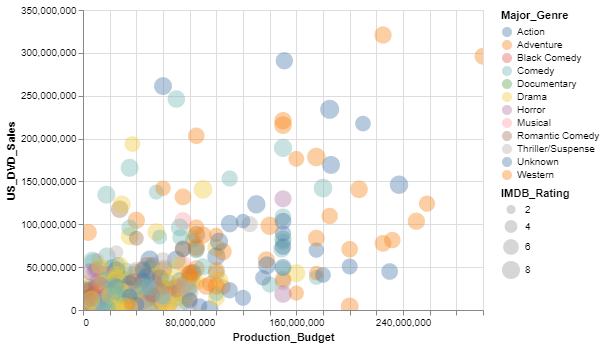

In [39]:
movies_chart()

### Ejercicio 2.3

Generar widgets para cada uno de los argumentos de la función `movies_chart`, los nombres sugeridos son:

- `year_widget` para el argumente `year`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `imdb_widget` para el argumente `imdb`, debe ser un `widget.FloatRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 0.1 unidad.
- `genre_widget` para el argumente `genre`, debe ser un `widget.SelectMultiple`, por defecto deben venir selecionados todos los géneros..
- `budget_widget` para el argumente `budget`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `ww_gross_widget` para el argumente `ww_gross`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.

Todo widget debe tener un valor adecuado para el argumento `description` y configurar el argumento `continuous_update = False`.

In [40]:
year_widget = widgets.IntRangeSlider(
    min = movies['Release_Date'].min().year,
    max = movies['Release_Date'].max().year,
    value = [movies['Release_Date'].min().year, movies['Release_Date'].max().year],
    step = 1
)

imdb_widget = widgets.FloatRangeSlider(
    min = movies['IMDB_Rating'].min(),
    max = movies['IMDB_Rating'].max(),
    value = [movies['IMDB_Rating'].min(), movies['IMDB_Rating'].max()],
    step = 0.1
)


genre_widget = widgets.SelectMultiple(
    options = movies['Major_Genre'].unique().tolist(),
    value = movies['Major_Genre'].unique().tolist()
)

budget_widget = widgets.IntRangeSlider(
    min = movies['Production_Budget'].min(),
    max = movies['Production_Budget'].max(),
    value = [movies['Production_Budget'].min(), movies['Production_Budget'].max()],
    step = 1
)

ww_gross_widget = widgets.IntRangeSlider(
    min = movies['Worldwide_Gross'].min(),
    max = movies['Worldwide_Gross'].max(),
    value = [movies['Worldwide_Gross'].min(), movies['Worldwide_Gross'].max()],
    step = 1
)

Finalmente, haciendo uso de `interactive`, la función `movies_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de las películas.

Respira profundo y explora tu creación!

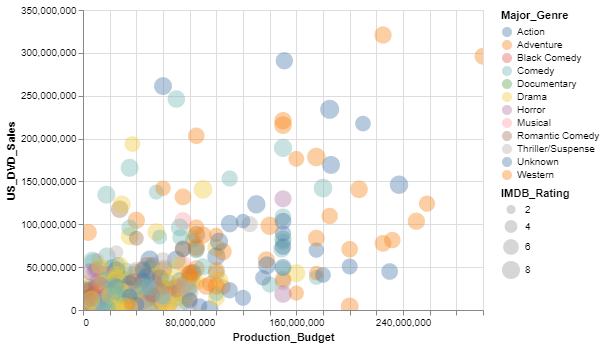

In [41]:
movies_dashboard = interactive(
    movies_chart,
    year=year_widget,
    imdb_rating=imdb_widget,
    genre=genre_widget,
    budget=budget_widget,
    ww_gross=ww_gross_widget
)
movies_dashboard